In [1]:
import numpy as np
import pandas as pd
import datetime as dt

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
sns.set()

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

from utils import get_splits

In [2]:
train, val, _ = get_splits()

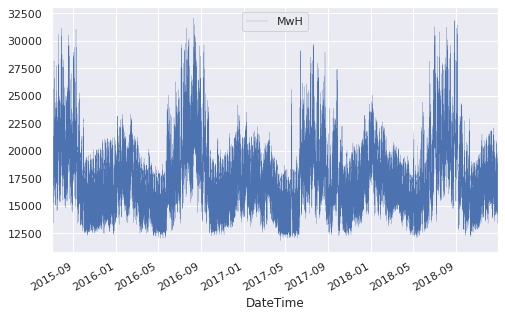

In [107]:
train.plot(x='DateTime', y='MwH', figsize=(8,5), linewidth = 0.2)

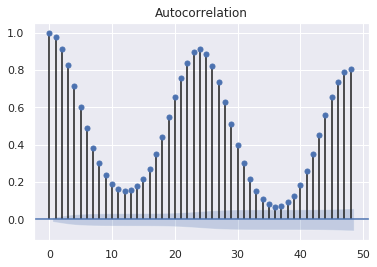

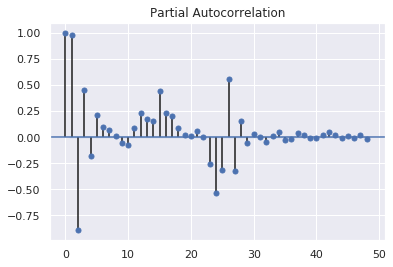

In [161]:
plot_acf(train['MwH'], lags = 48);
plot_pacf(train['MwH'], lags = 48);

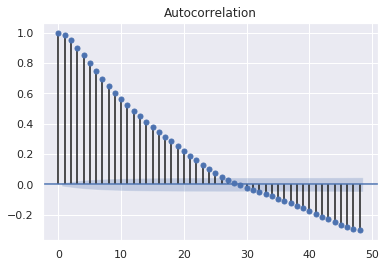

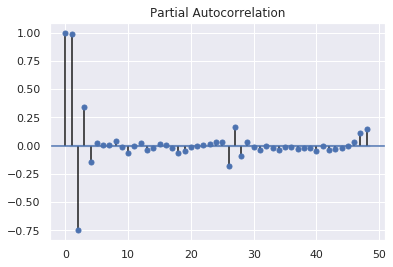

In [162]:
train['MwH_diff24'] = train['MwH'].diff(24)
plot_acf(train['MwH_diff24'][24:], lags = 48);
plot_pacf(train['MwH_diff24'][24:], lags = 48);

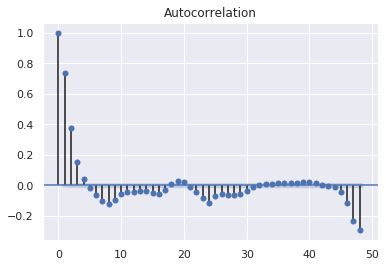

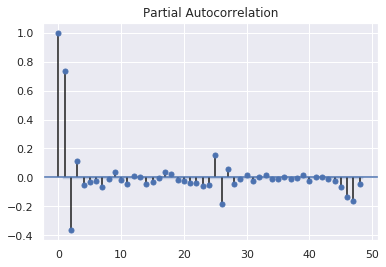

In [165]:
train['MwH_diff24_diff1'] = train['MwH_diff24'].diff(1)
plot_acf(train['MwH_diff24_diff1'][25:], lags = 48);
plot_pacf(train['MwH_diff24_diff1'][25:], lags = 48);

In [125]:
train['Date'] = train['DateTime'].apply(lambda x : x.date())
weekly_seasonality = train[['Date', 'MwH']].groupby('Date').sum().reset_index()
weekly_seasonality['Weekday'] = weekly_seasonality['Date'].apply(lambda x: x.weekday())
weekly_seasonality = weekly_seasonality[weekly_seasonality.Date >= dt.date(year = 2018, month = 1, day = 1)]
weekly_seasonality['Quarter'] = weekly_seasonality['Date'].apply(lambda x: (x.month-1)//3)

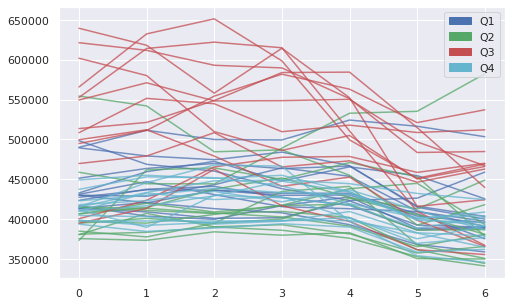

In [147]:
colors = ['b', 'g', 'r', 'c']
idxs = weekly_seasonality[weekly_seasonality['Weekday'] == 0].index.tolist()[:-1]
plt.figure(figsize=(8,5))
for idx in idxs:
    plt.plot(np.arange(7), weekly_seasonality.loc[idx:idx+6]['MwH'].values, c = colors[weekly_seasonality.loc[idx]['Quarter']], alpha = 0.75, zorder =1)
    
p1 = mpatches.Patch(color='b', label='Q1')
p2 = mpatches.Patch(color='g', label='Q2')
p3 = mpatches.Patch(color='r', label='Q3')
p4 = mpatches.Patch(color='c', label='Q4')
plt.legend(handles=[p1, p2, p3,p4])

In [128]:
yearly_seasonality = train[['Date', 'MwH']].groupby('Date').sum().reset_index()

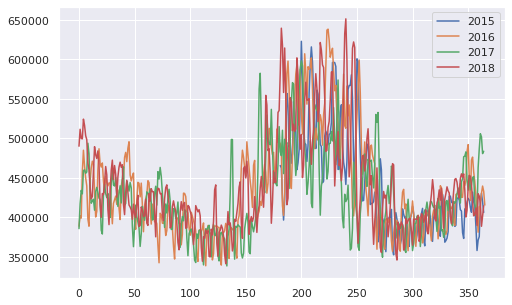

In [155]:
plt.figure(figsize=(8,5))
d = yearly_seasonality[(yearly_seasonality['Date'] < dt.date(year = 2016, month = 1, day = 1))]
plt.plot(np.arange(181, 365), d['MwH'], label = 2015)
for year in [2016, 2017, 2018]:
    d = yearly_seasonality[(yearly_seasonality['Date'] >= dt.date(year = year, month = 1, day = 1)) & 
        (yearly_seasonality['Date'] < dt.date(year = year+1, month = 1, day = 1))]
    plt.plot(np.arange(d.shape[0]), d['MwH'], label = year)
plt.legend()